In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open('names.txt', 'r').read().splitlines()
words[: 8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [5]:
#build the dataset
X = []
Y = []
block_size = 3 #characters to take into context to predict the next character

for w in words[:3]:
    context = [0] * block_size
    print(w)
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), '-->', itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... --> e
..e --> m
.em --> m
emm --> a
mma --> .
olivia
... --> o
..o --> l
.ol --> i
oli --> v
liv --> i
ivi --> a
via --> .
ava
... --> a
..a --> v
.av --> a
ava --> .


In [6]:
C = torch.randn((27, 2))   #each character has two embeddings

In [7]:
C[5]

tensor([ 0.1693, -1.0897])

In [8]:
C[X]

tensor([[[ 0.5648, -0.7951],
         [ 0.5648, -0.7951],
         [ 0.5648, -0.7951]],

        [[ 0.5648, -0.7951],
         [ 0.5648, -0.7951],
         [ 0.1693, -1.0897]],

        [[ 0.5648, -0.7951],
         [ 0.1693, -1.0897],
         [-0.4790,  0.2133]],

        [[ 0.1693, -1.0897],
         [-0.4790,  0.2133],
         [-0.4790,  0.2133]],

        [[-0.4790,  0.2133],
         [-0.4790,  0.2133],
         [ 0.4019, -0.4910]],

        [[ 0.5648, -0.7951],
         [ 0.5648, -0.7951],
         [ 0.5648, -0.7951]],

        [[ 0.5648, -0.7951],
         [ 0.5648, -0.7951],
         [ 0.5392, -0.4028]],

        [[ 0.5648, -0.7951],
         [ 0.5392, -0.4028],
         [ 0.6339,  0.2090]],

        [[ 0.5392, -0.4028],
         [ 0.6339,  0.2090],
         [-1.1579, -1.3847]],

        [[ 0.6339,  0.2090],
         [-1.1579, -1.3847],
         [-0.0373,  1.7040]],

        [[-1.1579, -1.3847],
         [-0.0373,  1.7040],
         [-1.1579, -1.3847]],

        [[-0.0373,  1

In [9]:
emb = C[X]
emb.shape

torch.Size([16, 3, 2])

In [10]:
W1 = torch.randn((6, 100))  # 6= 3*2,and 100 is a hyperparameter
b1 = torch.randn(100)
#hidden layer

In [11]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape #concate across dimension 1 to make it 16*6 from 16*3*3

torch.Size([16, 6])

In [12]:
torch.cat(torch.unbind(emb, 1), 1).shape #what if block size is changed --> this helps with generalization

torch.Size([16, 6])

In [13]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [14]:
a.shape

torch.Size([18])

In [15]:
a.view(9, 2) #change dimension without losing values

tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15],
        [16, 17]])

In [16]:
emb.view(16, 6) #.view is more efficient since no new memory is being created

tensor([[ 0.5648, -0.7951,  0.5648, -0.7951,  0.5648, -0.7951],
        [ 0.5648, -0.7951,  0.5648, -0.7951,  0.1693, -1.0897],
        [ 0.5648, -0.7951,  0.1693, -1.0897, -0.4790,  0.2133],
        [ 0.1693, -1.0897, -0.4790,  0.2133, -0.4790,  0.2133],
        [-0.4790,  0.2133, -0.4790,  0.2133,  0.4019, -0.4910],
        [ 0.5648, -0.7951,  0.5648, -0.7951,  0.5648, -0.7951],
        [ 0.5648, -0.7951,  0.5648, -0.7951,  0.5392, -0.4028],
        [ 0.5648, -0.7951,  0.5392, -0.4028,  0.6339,  0.2090],
        [ 0.5392, -0.4028,  0.6339,  0.2090, -1.1579, -1.3847],
        [ 0.6339,  0.2090, -1.1579, -1.3847, -0.0373,  1.7040],
        [-1.1579, -1.3847, -0.0373,  1.7040, -1.1579, -1.3847],
        [-0.0373,  1.7040, -1.1579, -1.3847,  0.4019, -0.4910],
        [ 0.5648, -0.7951,  0.5648, -0.7951,  0.5648, -0.7951],
        [ 0.5648, -0.7951,  0.5648, -0.7951,  0.4019, -0.4910],
        [ 0.5648, -0.7951,  0.4019, -0.4910, -0.0373,  1.7040],
        [ 0.4019, -0.4910, -0.0373,  1.7

In [17]:
h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)

In [18]:
h.shape

torch.Size([16, 100])

In [19]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [20]:
logits = h @ W2 + b2
counts = logits.exp()
prob = counts/counts.sum(1, keepdim = True)

In [21]:
loss = -prob[torch.arange(16), Y].log().mean()
loss

tensor(8.9751)

--Summarize---

In [78]:
#build the dataset
X = []
Y = []
block_size = 3 #characters to take into context to predict the next character

for w in words:
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [79]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [100]:
# training split, dev/validation split, test split
# 80% (for parameter tuning), 10% (for hyperparameters -eg:- hidden layer size), 10% (performance of the NN)

In [154]:
#build the dataset now split into training, test and validation
def build_dataset(words):
    block_size = 3
    X, Y = [], []
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182424, 3]) torch.Size([182424])
torch.Size([22836, 3]) torch.Size([22836])
torch.Size([22886, 3]) torch.Size([22886])


In [155]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 10), generator=g)    #increasing from 2 to 10
W1 = torch.randn((30, 200), generator=g)  #increasing from 100 to 200
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [156]:
sum(p.nelement() for p in parameters) #number of parameters

11897

In [157]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
lrs[[0, 10, -1]] #exponential learning rate list starting from 0.001 to 1

tensor([0.0010, 0.0011, 1.0000])

In [158]:
for p in parameters:
    p.requires_grad = True
lri =[]
lossi = []
stepi = []

In [159]:
for i in range(200000):
    #minibatch construct
    #use minibatch to update only a small subset of the features...since forward and backward pass for entire dataset is time intensive
    ix = torch.randint(0, Xtr.shape[0], (32,))
    
    #forward pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) #(x, 100) --> emb.view(-1, 6) is basically (x, 6)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix]) #cross entropy does count and prob calculation

    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    #update
    #lr = lrs[i]
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr*p.grad

    #track stats
    #lri.append(lre[i])
    lossi.append(loss.log10().item())
    stepi.append(i)

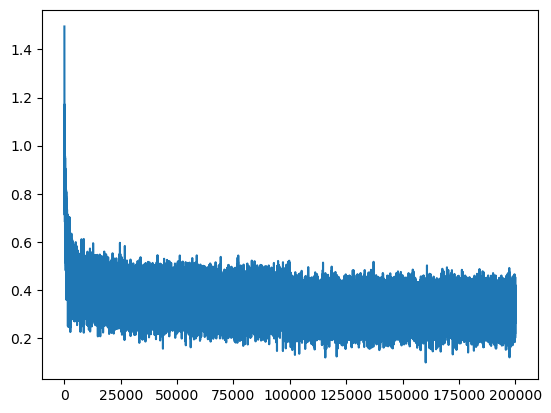

In [160]:
plt.plot(stepi, lossi)

In [161]:
emb = C[Xdev] #our training has not seen the Xdev examples
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev) 
print(loss.item())
#loss for dev set

2.169346809387207


In [162]:
emb = C[Xtr] #our training has not seen the Xtraining examples
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr) 
print(loss.item())
#loss for training set

2.113309860229492


In [133]:
#training and dev set losss are about equal. This means that there is no overfitting, but there is underfitting which means that the NN needs to be scaled up
#scaling up the NN can start by increasing the hidden layer of NN
#once the loss stops improving with hidden layer increase, increase the embedding size

In [151]:
#Once training and test loss start to deviate, there is indication of overfit

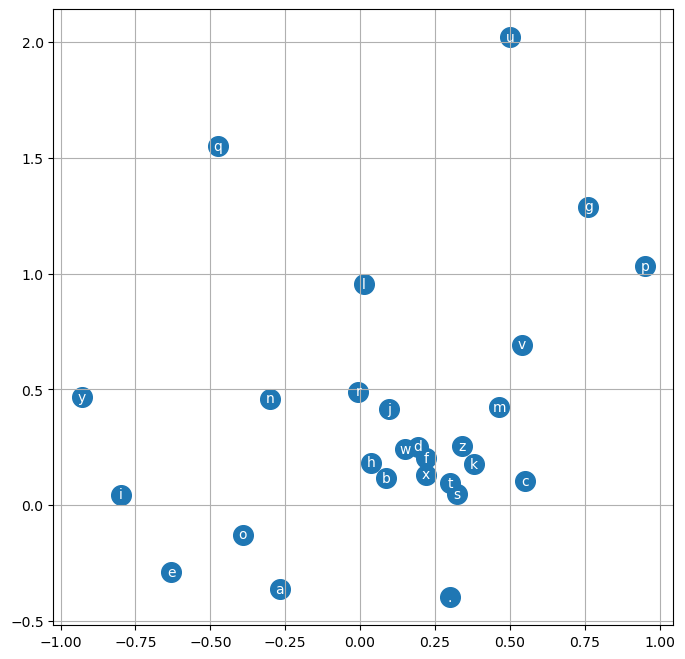

In [134]:
plt.figure(figsize = (8, 8))
plt.scatter(C[:, 0].data, C[:, 1].data, s = 200)
for i in range(C.shape[0]):
    plt.text(C[i, 0].item(), C[i, 1].item(), itos[i], ha='center', va='center', color='white')
plt.grid('minor')

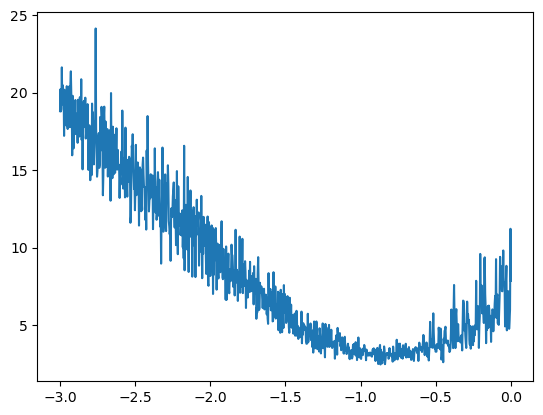

In [70]:
plt.plot(lri, lossi)

In [71]:
#0.1 is a good learning rate because at 10^-1, the learning rate exp vs loss is stable

In [172]:
g = torch.Generator().manual_seed(9034568)
for _ in range(10):
    out = []
    context = [0] * block_size
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1, block_size*C.shape[1])@W1 + b1)
        logits = h@W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples = 1, generator = g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    print(''.join(itos[i] for i in out))

callyn.
erya.
jesy.
gyana.
aivikariankelin.
mominisenn.
canya.
jorda.
tari.
nakad.
